#  Task 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter for Wyoming
state = 'WY'
wy_cases_data = covid_cases_data[covid_cases_data['State'] == state]

# Filter for the date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
wy_cases_data = wy_cases_data.set_index('County Name')[date_range]

# Identify top 5 counties with highest cases
top_counties = wy_cases_data.sum(axis=1).nlargest(5)
top_counties_data = wy_cases_data.loc[top_counties.index]

# Sum cases for the state
state_cases = wy_cases_data.sum(axis=0)

In [3]:
# Load case and death data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter for Wyoming and the date range
state = 'WY'
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d')

wy_cases_data = covid_cases_data[covid_cases_data['State'] == state]
wy_deaths_data = covid_deaths_data[covid_deaths_data['State'] == state]

# Ensure data is filtered by the date range
wy_cases_data = wy_cases_data.set_index('County Name')[date_range]
wy_deaths_data = wy_deaths_data.set_index('County Name')[date_range]

# Calculate the total number of cases and deaths for each county
wy_cases_data['Total Cases'] = wy_cases_data.sum(axis=1)
wy_deaths_data['Total Deaths'] = wy_deaths_data.sum(axis=1)

# Identify top 5 counties with the highest number of cases and deaths
top_counties_cases = wy_cases_data['Total Cases'].nlargest(5)
top_counties_deaths = wy_deaths_data['Total Deaths'].nlargest(5)

print("Top 5 Counties in Wyoming by Total Cases:")
print(top_counties_cases)

print("\nTop 5 Counties in Wyoming by Total Deaths:")
print(top_counties_deaths)

Top 5 Counties in Wyoming by Total Cases:
County Name
Laramie County      407998
Natrona County      361378
Fremont County      290351
Albany County       231361
Campbell County     225032
Name: Total Cases, dtype: int64

Top 5 Counties in Wyoming by Total Deaths:
County Name
Fremont County      4211
Natrona County      3537
Laramie County      2380
Washakie County     1426
Campbell County     1093
Name: Total Deaths, dtype: int64


Wyoming State - Linear RMSE: 6979.588097467433, Polynomial RMSE: 2060.5056773706547
Laramie County  County - Linear RMSE: 1212.0641578828252, Polynomial RMSE: 376.63837625528265
Natrona County  County - Linear RMSE: 1161.7047599683447, Polynomial RMSE: 395.73096948171957
Fremont County  County - Linear RMSE: 610.8744685991824, Polynomial RMSE: 240.45240070804158
Albany County  County - Linear RMSE: 561.9318040562816, Polynomial RMSE: 235.43869887819335
Campbell County  County - Linear RMSE: 706.0030516050018, Polynomial RMSE: 193.27449765016996


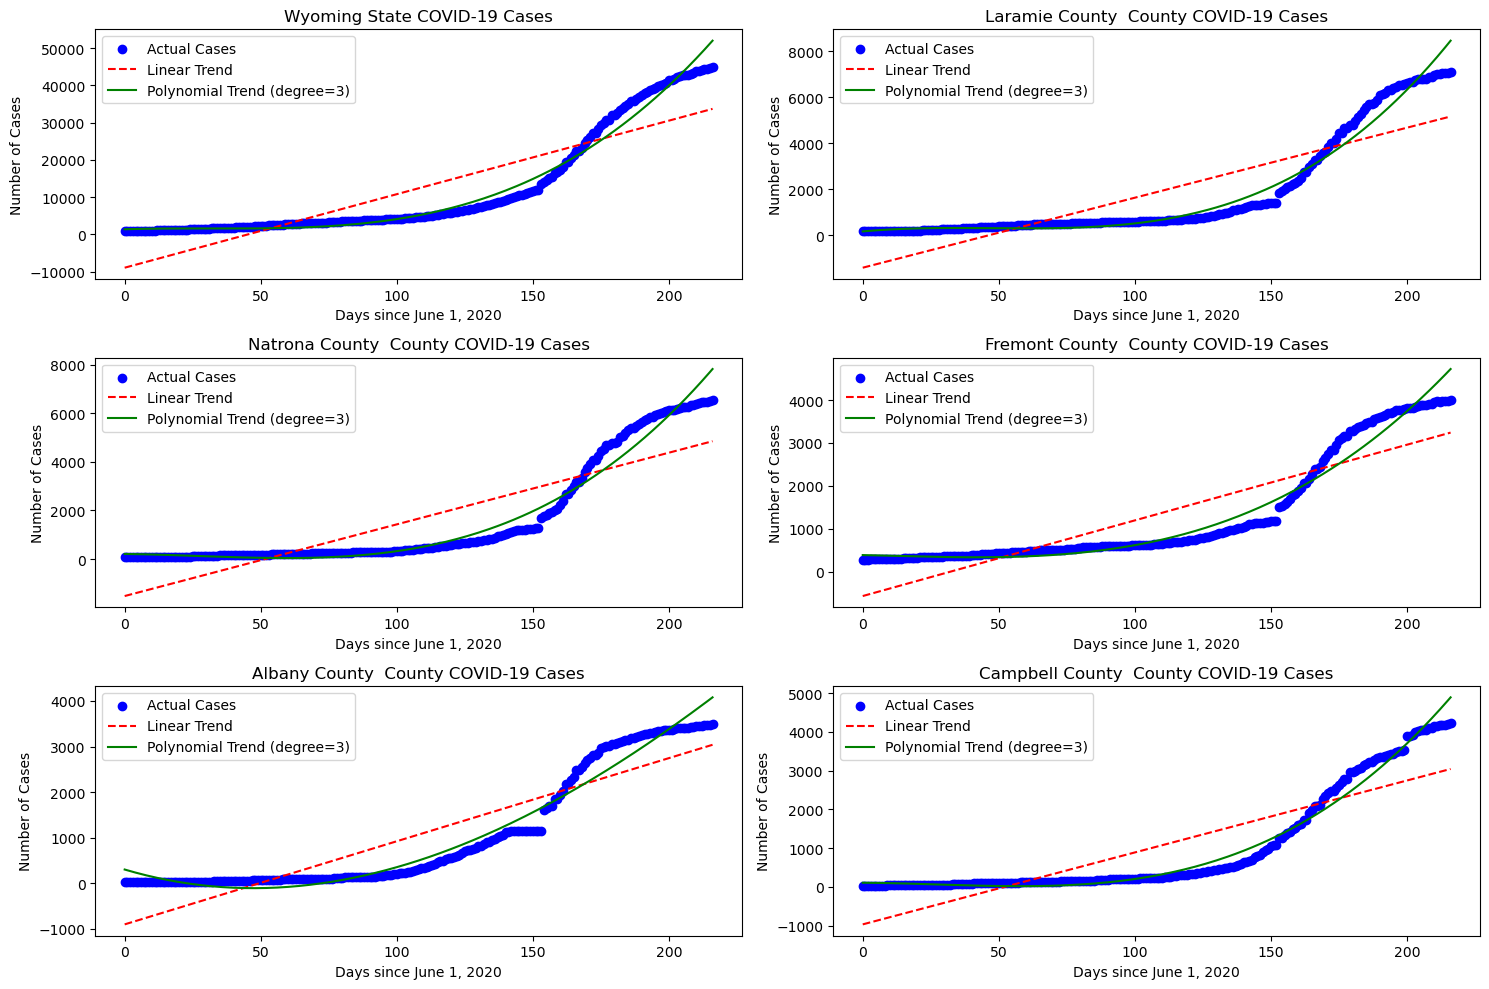

In [4]:
def analyze_and_plot(data, title, ax):
    days = np.arange(len(data))
    X = days.reshape(-1, 1)

    # Linear regression
    lin_reg = LinearRegression().fit(X, data)
    linear_pred = lin_reg.predict(X)
    linear_rmse = np.sqrt(mean_squared_error(data, linear_pred))

    # Polynomial regression
    degree = 3
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression().fit(X_poly, data)
    poly_pred = poly_reg.predict(X_poly)
    poly_rmse = np.sqrt(mean_squared_error(data, poly_pred))

    # Plotting
    ax.scatter(days, data, color='blue', label='Actual Cases')
    ax.plot(days, linear_pred, color='red', linestyle='--', label='Linear Trend')
    ax.plot(days, poly_pred, color='green', label='Polynomial Trend (degree=3)')
    ax.set_title(title)
    ax.set_xlabel('Days since June 1, 2020')
    ax.set_ylabel('Number of Cases')
    ax.legend()

    return linear_rmse, poly_rmse

# Plot and calculate RMSE for the state and top counties
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(321)
state_linear_rmse, state_poly_rmse = analyze_and_plot(state_cases.values, 'Wyoming State COVID-19 Cases', ax1)
print(f"Wyoming State - Linear RMSE: {state_linear_rmse}, Polynomial RMSE: {state_poly_rmse}")

county_rmses = {}
for i, county in enumerate(top_counties_data.index, start=2):
    ax = plt.subplot(3, 2, i)
    linear_rmse, poly_rmse = analyze_and_plot(top_counties_data.loc[county].values, f'{county} County COVID-19 Cases', ax)
    county_rmses[county] = (linear_rmse, poly_rmse)
    print(f"{county} County - Linear RMSE: {linear_rmse}, Polynomial RMSE: {poly_rmse}")

plt.tight_layout()
plt.show()


In [5]:
wy_cases_data.head(50)

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,Total Cases
County Name,,,,,,,,,,,,,,,,,,,,,
Statewide Unallocated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albany County,25,25,25,25,25,25,25,25,25,25,...,3423,3426,3444,3450,3460,3469,3469,3478,3490,231361
Big Horn County,6,6,6,6,6,6,8,8,9,9,...,730,730,748,754,767,788,788,794,817,42177
Campbell County,31,31,31,32,32,32,32,35,35,37,...,4100,4100,4140,4152,4176,4185,4185,4201,4236,225032
Carbon County,16,16,16,16,16,16,16,16,16,16,...,928,928,939,943,944,946,946,948,961,65078
Converse County,24,24,24,24,24,24,24,24,24,24,...,771,771,784,788,796,803,803,810,811,51547
Crook County,5,5,5,5,5,5,5,5,5,5,...,382,382,383,385,388,388,388,388,388,22939
Fremont County,282,283,285,287,289,295,295,295,295,296,...,3910,3916,3962,3967,3959,3968,3968,3976,3991,290351
Goshen County,5,5,5,5,5,5,5,5,5,5,...,980,980,997,997,1002,1010,1010,1010,1012,51887


# Deaths

In [6]:
# Load death data (assuming it's already loaded into covid_deaths_data)
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter for Wyoming
state = 'WY'
wy_deaths_data = covid_deaths_data[covid_deaths_data['State'] == state]

# Filter for the date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
wy_deaths_data = wy_deaths_data.set_index('County Name')[date_range]

# Identify top 5 counties with highest cases
top_counties_deaths = wy_deaths_data.sum(axis=1).nlargest(5)
top_counties_data_deaths = wy_deaths_data.loc[top_counties_deaths.index]

# Sum cases for the state
state_deaths = wy_deaths_data.sum(axis=0)


In [7]:
# Load case and death data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter for Wyoming and the date range
state = 'WY'
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d')

wy_cases_data = covid_cases_data[covid_cases_data['State'] == state]
wy_deaths_data = covid_deaths_data[covid_deaths_data['State'] == state]

# Ensure data is filtered by the date range
wy_cases_data = wy_cases_data.set_index('County Name')[date_range]
wy_deaths_data = wy_deaths_data.set_index('County Name')[date_range]

# Calculate the total number of cases and deaths for each county
wy_cases_data['Total Cases'] = wy_cases_data.sum(axis=1)
wy_deaths_data['Total Deaths'] = wy_deaths_data.sum(axis=1)

# Identify top 5 counties with the highest number of cases and deaths
top_counties_cases = wy_cases_data['Total Cases'].nlargest(5)
top_counties_deaths = wy_deaths_data['Total Deaths'].nlargest(5)

print("Top 5 Counties in Wyoming by Total Cases:")
print(top_counties_cases)

print("\nTop 5 Counties in Wyoming by Total Deaths:")
print(top_counties_deaths)

Top 5 Counties in Wyoming by Total Cases:
County Name
Laramie County      407998
Natrona County      361378
Fremont County      290351
Albany County       231361
Campbell County     225032
Name: Total Cases, dtype: int64

Top 5 Counties in Wyoming by Total Deaths:
County Name
Fremont County      4211
Natrona County      3537
Laramie County      2380
Washakie County     1426
Campbell County     1093
Name: Total Deaths, dtype: int64


Wyoming State - Linear RMSE: 64.68331624278757, Polynomial RMSE: 12.454980909740108
Fremont County  County - Linear RMSE: 8.756755634822987, Polynomial RMSE: 2.4453458005433766
Natrona County  County - Linear RMSE: 15.802539889172897, Polynomial RMSE: 3.515436341832963
Laramie County  County - Linear RMSE: 10.183539411161375, Polynomial RMSE: 2.391478239418395
Washakie County  County - Linear RMSE: 1.6611634546119807, Polynomial RMSE: 0.9478959120570946
Campbell County  County - Linear RMSE: 4.9519850786834105, Polynomial RMSE: 1.1095931291710053


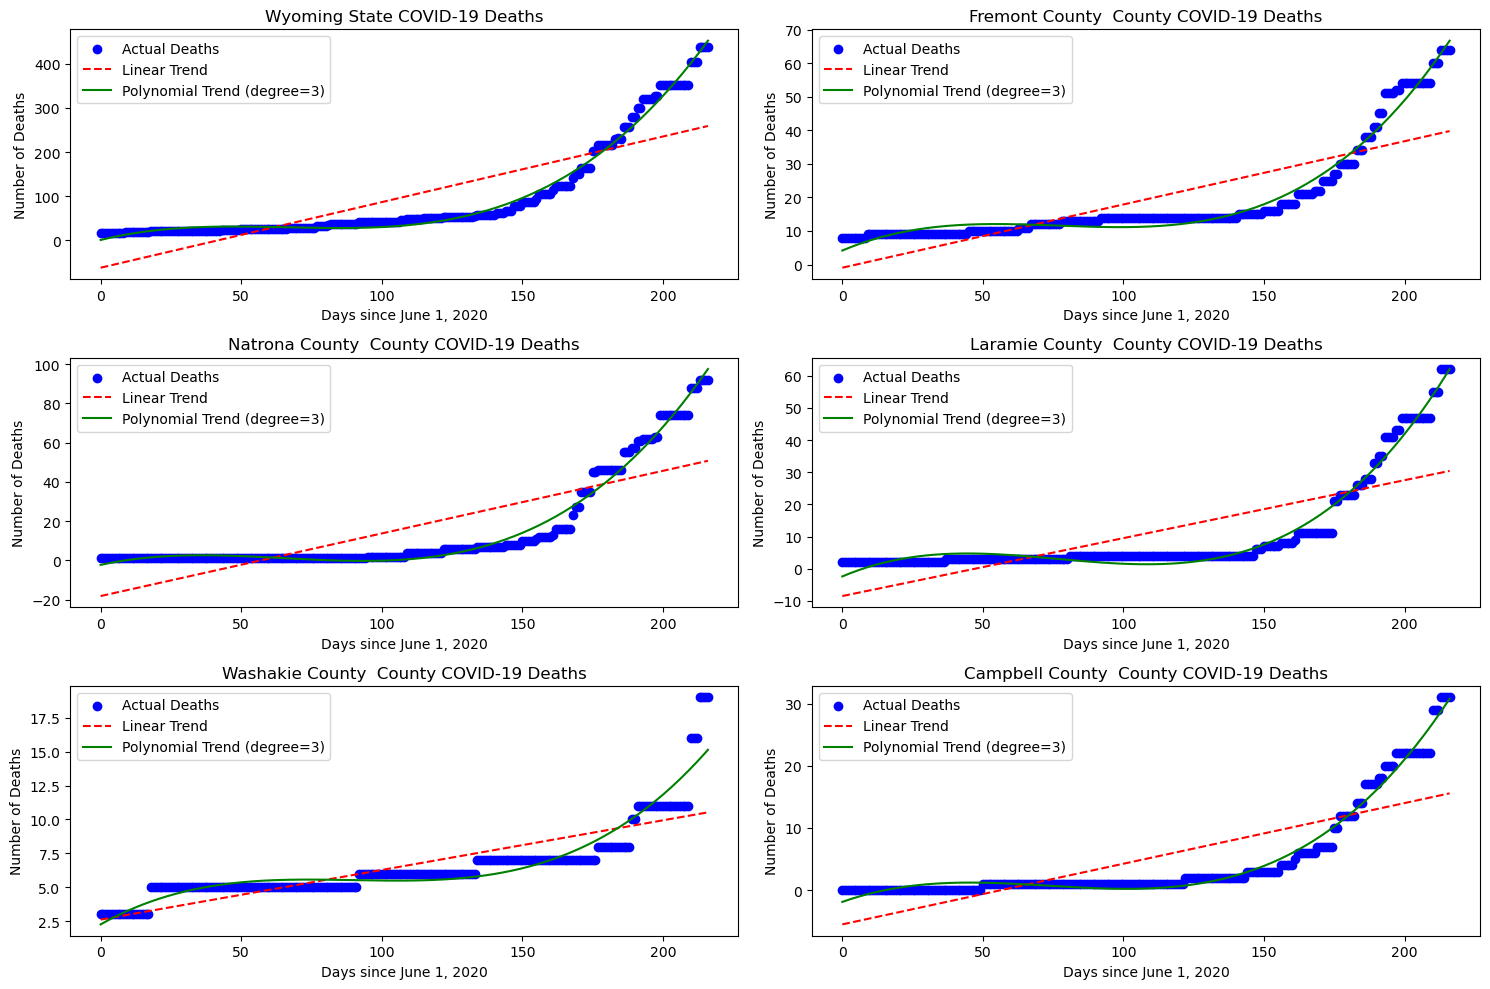

In [8]:
# Define the function to analyze and plot data
def analyze_and_plot(data, title, ax):
    days = np.arange(len(data))
    X = days.reshape(-1, 1)

    # Linear regression
    lin_reg = LinearRegression().fit(X, data)
    linear_pred = lin_reg.predict(X)
    linear_rmse = np.sqrt(mean_squared_error(data, linear_pred))

    # Polynomial regression
    degree = 3
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression().fit(X_poly, data)
    poly_pred = poly_reg.predict(X_poly)
    poly_rmse = np.sqrt(mean_squared_error(data, poly_pred))

    # Plotting
    ax.scatter(days, data, color='blue', label='Actual Deaths')
    ax.plot(days, linear_pred, color='red', linestyle='--', label='Linear Trend')
    ax.plot(days, poly_pred, color='green', label='Polynomial Trend (degree=3)')
    ax.set_title(title)
    ax.set_xlabel('Days since June 1, 2020')
    ax.set_ylabel('Number of Deaths')
    ax.legend()

    return linear_rmse, poly_rmse


plt.figure(figsize=(15, 10))

# Plot and calculate RMSE for the state
ax1 = plt.subplot(321)
state_linear_rmse, state_poly_rmse = analyze_and_plot(state_deaths.values, 'Wyoming State COVID-19 Deaths', ax1)
print(f"Wyoming State - Linear RMSE: {state_linear_rmse}, Polynomial RMSE: {state_poly_rmse}")

# Plot and calculate RMSE for the top counties
county_rmses = {}
for i, county in enumerate(top_counties_data_deaths.index, start=2):
    ax = plt.subplot(3, 2, i)
    county_data = top_counties_data_deaths.loc[county]
    linear_rmse, poly_rmse = analyze_and_plot(county_data.values, f'{county} County COVID-19 Deaths', ax)
    county_rmses[county] = (linear_rmse, poly_rmse)
    print(f"{county} County - Linear RMSE: {linear_rmse}, Polynomial RMSE: {poly_rmse}")

plt.tight_layout()
plt.show()

In [9]:
wy_deaths_data.head(50)

,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,...,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31,2021-01-01,2021-01-02,2021-01-03,Total Deaths
County Name,,,,,,,,,,,,,,,,,,,,,
Statewide Unallocated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
Albany County,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,574
Big Horn County,0,0,0,0,0,0,0,0,0,0,...,15,15,19,19,19,21,21,21,21,963
Campbell County,0,0,0,0,0,0,0,0,0,0,...,22,22,29,29,29,31,31,31,31,1093
Carbon County,1,1,1,1,1,1,1,1,1,1,...,12,12,14,14,14,15,15,15,15,760
Converse County,0,0,0,0,0,0,0,0,0,0,...,10,10,11,11,11,11,11,11,11,451
Crook County,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,7,7,7,7,288
Fremont County,8,8,8,8,8,8,8,8,8,9,...,54,54,60,60,60,64,64,64,64,4211
Goshen County,0,0,0,0,0,0,0,0,0,0,...,13,13,15,15,15,17,17,17,17,760


# Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends. (10 points)

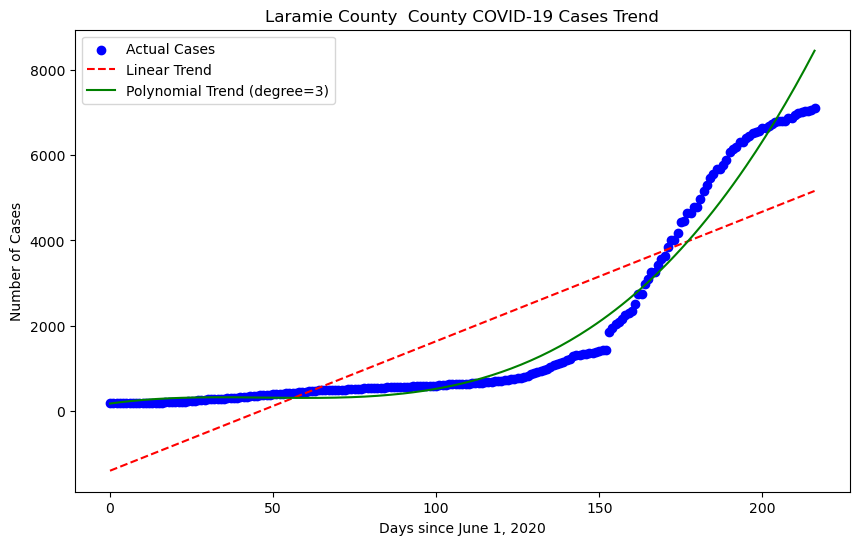

Laramie County  County:
Linear trend indicates a rising number of cases over time.
Polynomial trend suggests the case number change is accelerating.



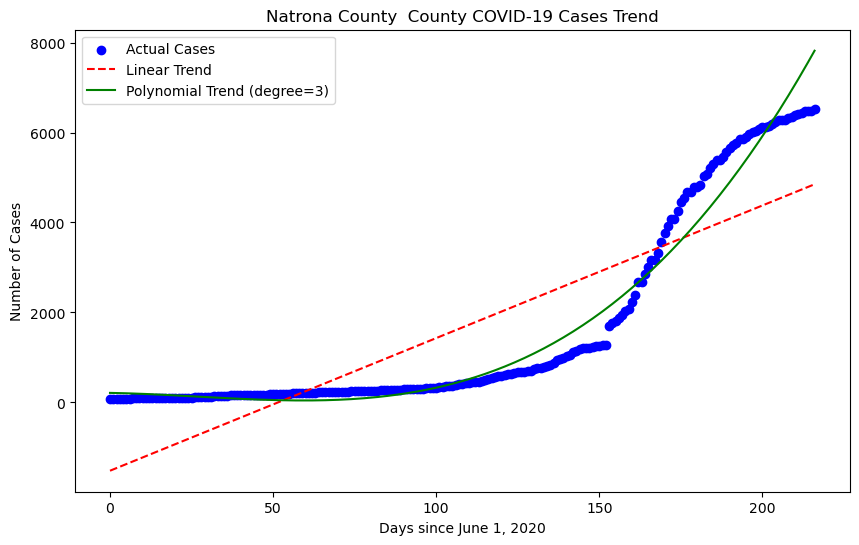

Natrona County  County:
Linear trend indicates a rising number of cases over time.
Polynomial trend suggests the case number change is accelerating.



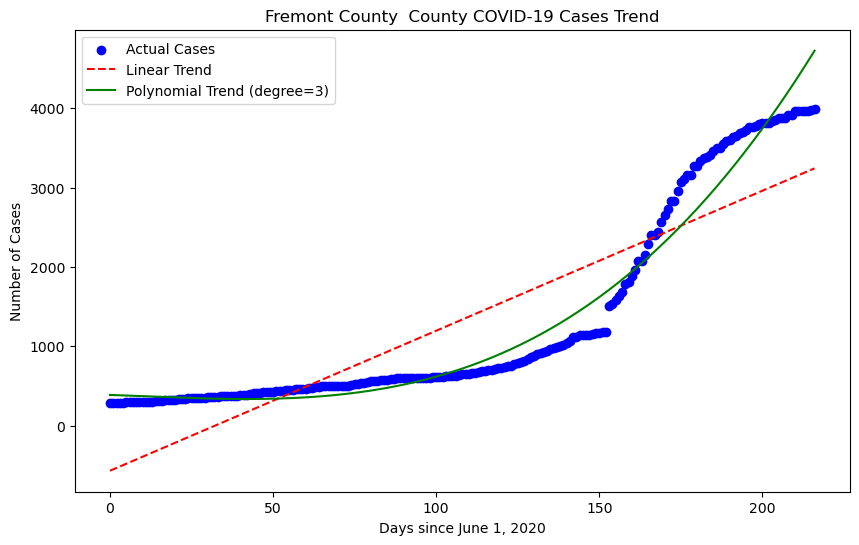

Fremont County  County:
Linear trend indicates a rising number of cases over time.
Polynomial trend suggests the case number change is accelerating.



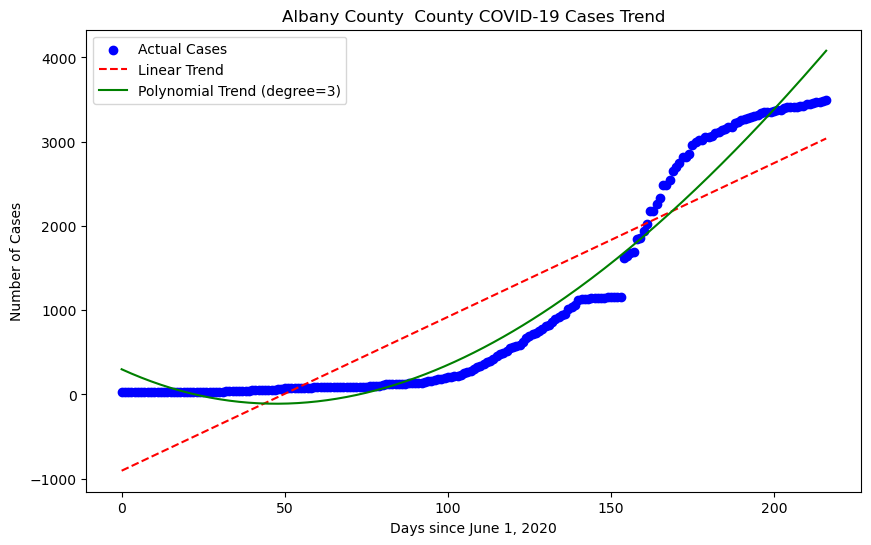

Albany County  County:
Linear trend indicates a rising number of cases over time.
Polynomial trend suggests the case number change is decelerating.



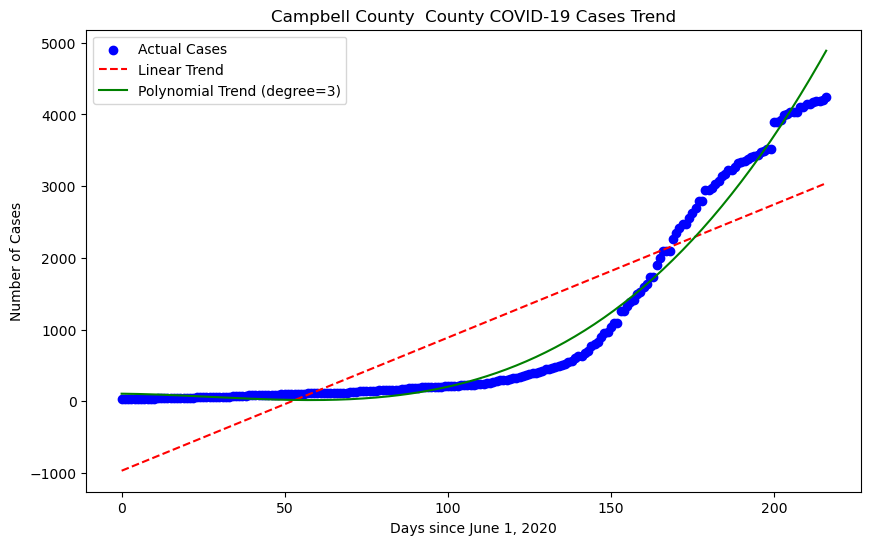

Campbell County  County:
Linear trend indicates a rising number of cases over time.
Polynomial trend suggests the case number change is accelerating.



In [10]:

for county in top_counties_data.index:
    # Get the case data for the county
    county_data = top_counties_data.loc[county]

    # Model the trend using linear and polynomial regression
    days = np.arange(len(county_data))
    X = days.reshape(-1, 1)
    
    # Linear regression
    lin_reg = LinearRegression().fit(X, county_data)
    linear_pred = lin_reg.predict(X)

    # Polynomial regression
    degree = 3  # or another degree based on model fit analysis
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression().fit(X_poly, county_data)
    poly_pred = poly_reg.predict(X_poly)

    # Plotting for visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(days, county_data, color='blue', label='Actual Cases')
    plt.plot(days, linear_pred, color='red', linestyle='--', label='Linear Trend')
    plt.plot(days, poly_pred, color='green', label=f'Polynomial Trend (degree={degree})')
    plt.title(f'{county} County COVID-19 Cases Trend')
    plt.xlabel('Days since June 1, 2020')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.show()

    # Describe the trend
    print(f"{county} County:")
    print(f"Linear trend indicates a {'rising' if lin_reg.coef_[0] > 0 else 'falling'} number of cases over time.")
    degree_of_change = 'accelerating' if poly_reg.coef_[-1] > 0 else 'decelerating'
    print(f"Polynomial trend suggests the case number change is {degree_of_change}.\n")


The analysis of COVID-19 case trends across the counties reveals a general uptrend in cases, signifying a worsening situation. However, a noteworthy exception is Albany County, where the polynomial trend analysis indicates a slowing growth rate in new cases. This deceleration suggests that, although the total case count continues to climb, the rate at which new cases are being reported is diminishing. It may due to the lack of report form local health department.

# Perform hypothesis tests on questions identified in Stage III. (30 points)

In [11]:

pd.set_option('display.max_columns', None)

candidate = pd.read_csv('candidate.csv')

candidate

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [14]:
Wyoming_data = candidate[candidate['state'] == 'Wyoming']

Wyoming_data.head(50)

,state,county,candidate,party,total_votes,won
27843,Wyoming,Albany County,Joe Biden,DEM,9092,True
27844,Wyoming,Albany County,Donald Trump,REP,8579,False
27845,Wyoming,Albany County,Jo Jorgensen,LIB,595,False
27846,Wyoming,Albany County,Brock Pierce,IND,178,False
27847,Wyoming,Albany County,Write-ins,WRI,173,False
27848,Wyoming,Big Horn County,Donald Trump,REP,4806,True
27849,Wyoming,Big Horn County,Joe Biden,DEM,788,False
27850,Wyoming,Big Horn County,Jo Jorgensen,LIB,74,False
27851,Wyoming,Big Horn County,Brock Pierce,IND,46,False
27852,Wyoming,Big Horn County,Write-ins,WRI,38,False


In [35]:

pd.set_option('display.max_columns', None)

candidate = pd.read_csv('candidate.csv')

wy_candidate = candidate[candidate['state'] == 'Wyoming']

total_votes_per_county = wy_candidate.groupby('county')['total_votes'].sum().reset_index()

dem_votes_per_county = wy_candidate[wy_candidate['party'] == 'DEM'][['county', 'total_votes']]
dem_votes_per_county = dem_votes_per_county.rename(columns={'total_votes': 'dem_votes'})

county_dem_percent = pd.merge(total_votes_per_county, dem_votes_per_county, on='county')
county_dem_percent['dem_percent'] = county_dem_percent['dem_votes'] / county_dem_percent['total_votes']


county_dem_percent

,county,total_votes,dem_votes,dem_percent
0,Albany County,18617,9092,0.488371
1,Big Horn County,5752,788,0.136996
2,Campbell County,19566,1935,0.098896
3,Carbon County,6664,1427,0.214136
4,Converse County,6970,861,0.123529
5,Crook County,4119,378,0.091770
6,Fremont County,18111,5519,0.304732
7,Goshen County,6241,1203,0.192758
8,Hot Springs County,2577,482,0.187039
9,Johnson County,4914,897,0.182540


In [37]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Load election data
candidate = pd.read_csv('candidate.csv')

# Filter data for Wyoming
wy_candidate = candidate[candidate['state'] == 'Wyoming']

# Calculate total votes per county
total_votes_per_county = wy_candidate.groupby('county')['total_votes'].sum().reset_index()

# Extract the vote counts for the Democratic party in each county
dem_votes_per_county = wy_candidate[wy_candidate['party'] == 'DEM'][['county', 'total_votes']]
dem_votes_per_county = dem_votes_per_county.rename(columns={'total_votes': 'dem_votes'})

# Merge total votes and Democratic votes to calculate the percentage of Democratic votes
county_dem_percent = pd.merge(total_votes_per_county, dem_votes_per_county, on='county')
county_dem_percent['dem_percent'] = county_dem_percent['dem_votes'] / county_dem_percent['total_votes']

# Output the calculated result
print(county_dem_percent)

# Next, load and prepare COVID-19 case data
# Assuming you already have COVID-19 case data for Wyoming
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
wy_cases_data = covid_cases_data[covid_cases_data['State'] == 'WY']

# Select the date range for the analysis
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
wy_cases_data = wy_cases_data.set_index('County Name')[date_range]

# Calculate the total number of cases for each county
wy_cases_total = wy_cases_data.sum(axis=1).reset_index(name='Total Cases')

# Merge COVID-19 case data and election data, assuming the county name column in wy_cases_total is 'County Name'
merged_data = pd.merge(wy_cases_total, county_dem_percent, left_on='County Name', right_on='county')


                county  total_votes  dem_votes  dem_percent
0        Albany County        18617       9092     0.488371
1      Big Horn County         5752        788     0.136996
2      Campbell County        19566       1935     0.098896
3        Carbon County         6664       1427     0.214136
4      Converse County         6970        861     0.123529
5         Crook County         4119        378     0.091770
6       Fremont County        18111       5519     0.304732
7        Goshen County         6241       1203     0.192758
8   Hot Springs County         2577        482     0.187039
9       Johnson County         4914        897     0.182540
10      Laramie County        44982      15217     0.338291
11      Lincoln County        10468       1509     0.144154
12      Natrona County        35202       8530     0.242316
13     Niobrara County         1308        155     0.118502
14         Park County        16717       3410     0.203984
15       Platte County         4923     

In [38]:

print(wy_cases_total['County Name'].unique())


print(county_dem_percent['county'].unique())


['Statewide Unallocated' 'Albany County ' 'Big Horn County '
 'Campbell County ' 'Carbon County ' 'Converse County ' 'Crook County '
 'Fremont County ' 'Goshen County ' 'Hot Springs County '
 'Johnson County ' 'Laramie County ' 'Lincoln County ' 'Natrona County '
 'Niobrara County ' 'Park County ' 'Platte County ' 'Sheridan County '
 'Sublette County ' 'Sweetwater County ' 'Teton County ' 'Uinta County '
 'Washakie County ' 'Weston County ']
['Albany County' 'Big Horn County' 'Campbell County' 'Carbon County'
 'Converse County' 'Crook County' 'Fremont County' 'Goshen County'
 'Hot Springs County' 'Johnson County' 'Laramie County' 'Lincoln County'
 'Natrona County' 'Niobrara County' 'Park County' 'Platte County'
 'Sheridan County' 'Sublette County' 'Sweetwater County' 'Teton County'
 'Uinta County' 'Washakie County' 'Weston County']


In [39]:
wy_cases_total['County Name'] = wy_cases_total['County Name'].str.upper().str.strip()
county_dem_percent['county'] = county_dem_percent['county'].str.upper().str.strip()


In [40]:

merged_data = pd.merge(wy_cases_total, county_dem_percent, left_on='County Name', right_on='county')


print(merged_data.head())


       County Name  Total Cases           county  total_votes  dem_votes  \
0    ALBANY COUNTY       231361    ALBANY COUNTY        18617       9092   
1  BIG HORN COUNTY        42177  BIG HORN COUNTY         5752        788   
2  CAMPBELL COUNTY       225032  CAMPBELL COUNTY        19566       1935   
3    CARBON COUNTY        65078    CARBON COUNTY         6664       1427   
4  CONVERSE COUNTY        51547  CONVERSE COUNTY         6970        861   

   dem_percent  
0     0.488371  
1     0.136996  
2     0.098896  
3     0.214136  
4     0.123529  


In [41]:
merged_data

,County Name,Total Cases,county,total_votes,dem_votes,dem_percent
0,ALBANY COUNTY,231361,ALBANY COUNTY,18617,9092,0.488371
1,BIG HORN COUNTY,42177,BIG HORN COUNTY,5752,788,0.136996
2,CAMPBELL COUNTY,225032,CAMPBELL COUNTY,19566,1935,0.098896
3,CARBON COUNTY,65078,CARBON COUNTY,6664,1427,0.214136
4,CONVERSE COUNTY,51547,CONVERSE COUNTY,6970,861,0.123529
5,CROOK COUNTY,22939,CROOK COUNTY,4119,378,0.091770
6,FREMONT COUNTY,290351,FREMONT COUNTY,18111,5519,0.304732
7,GOSHEN COUNTY,51887,GOSHEN COUNTY,6241,1203,0.192758
8,HOT SPRINGS COUNTY,13508,HOT SPRINGS COUNTY,2577,482,0.187039
9,JOHNSON COUNTY,26732,JOHNSON COUNTY,4914,897,0.182540


In [42]:
from scipy.stats import ttest_ind

# Group by median Democratic vote percentage
median_dem_percent = merged_data['dem_percent'].median()
high_dem_counties = merged_data[merged_data['dem_percent'] >= median_dem_percent]
low_dem_counties = merged_data[merged_data['dem_percent'] < median_dem_percent]

# Perform two-sample t-test
t_stat, p_value = ttest_ind(high_dem_counties['Total Cases'], low_dem_counties['Total Cases'], equal_var=False)
print(f"Two-sample t-test results: t-statistic={t_stat}, p-value={p_value}")

# If the actual data shows that counties with a higher percentage of Democratic votes have a higher number of cases
t_stat, p_value = ttest_ind(high_dem_counties['Total Cases'], low_dem_counties['Total Cases'], equal_var=False, alternative='greater')
print(f"One-tail t-test result (counties with higher Democratic vote percentage have higher case numbers): t-statistic={t_stat}, p-value={p_value}")


Two-sample t-test results: t-statistic=2.637571688628065, p-value=0.017954185883179374
One-tail t-test result (counties with higher Democratic vote percentage have higher case numbers): t-statistic=2.637571688628065, p-value=0.008977092941589687


#  Adding Rep Data

In [43]:

rep_votes_per_county = wy_candidate[wy_candidate['party'] == 'REP'][['county', 'total_votes']]
rep_votes_per_county = rep_votes_per_county.rename(columns={'total_votes': 'rep_votes'})


county_rep_percent = pd.merge(total_votes_per_county, rep_votes_per_county, on='county')
county_rep_percent['rep_percent'] = county_rep_percent['rep_votes'] / county_rep_percent['total_votes']




In [44]:
county_rep_percent

,county,total_votes,rep_votes,rep_percent
0,Albany County,18617,8579,0.460815
1,Big Horn County,5752,4806,0.835535
2,Campbell County,19566,16975,0.867576
3,Carbon County,6664,5014,0.752401
4,Converse County,6970,5917,0.848924
5,Crook County,4119,3651,0.886380
6,Fremont County,18111,12007,0.662967
7,Goshen County,6241,4878,0.781606
8,Hot Springs County,2577,1999,0.775708
9,Johnson County,4914,3881,0.789784


In [45]:

rep_votes_per_county = wy_candidate[wy_candidate['party'] == 'REP'][['county', 'total_votes']].rename(columns={'total_votes': 'rep_votes'})
county_rep_percent = pd.merge(total_votes_per_county, rep_votes_per_county, on='county')
county_rep_percent['rep_percent'] = county_rep_percent['rep_votes'] / county_rep_percent['total_votes']

wy_cases_total['County Name'] = wy_cases_total['County Name'].str.upper().str.strip()
county_rep_percent['county'] = county_rep_percent['county'].str.upper().str.strip()



In [46]:

merged_rep_data = pd.merge(wy_cases_total, county_rep_percent, left_on='County Name', right_on='county')


In [47]:
merged_rep_data

,County Name,Total Cases,county,total_votes,rep_votes,rep_percent
0,ALBANY COUNTY,231361,ALBANY COUNTY,18617,8579,0.460815
1,BIG HORN COUNTY,42177,BIG HORN COUNTY,5752,4806,0.835535
2,CAMPBELL COUNTY,225032,CAMPBELL COUNTY,19566,16975,0.867576
3,CARBON COUNTY,65078,CARBON COUNTY,6664,5014,0.752401
4,CONVERSE COUNTY,51547,CONVERSE COUNTY,6970,5917,0.848924
5,CROOK COUNTY,22939,CROOK COUNTY,4119,3651,0.886380
6,FREMONT COUNTY,290351,FREMONT COUNTY,18111,12007,0.662967
7,GOSHEN COUNTY,51887,GOSHEN COUNTY,6241,4878,0.781606
8,HOT SPRINGS COUNTY,13508,HOT SPRINGS COUNTY,2577,1999,0.775708
9,JOHNSON COUNTY,26732,JOHNSON COUNTY,4914,3881,0.789784


In [48]:
from scipy.stats import ttest_ind

# Group by the median Republican vote percentage
median_rep_percent = merged_rep_data['rep_percent'].median()
high_rep_counties = merged_rep_data[merged_rep_data['rep_percent'] >= median_rep_percent]
low_rep_counties = merged_rep_data[merged_rep_data['rep_percent'] < median_rep_percent]

# Perform two-tail t-test
t_stat_rep, p_value_rep = ttest_ind(high_rep_counties['Total Cases'], low_rep_counties['Total Cases'], equal_var=False)
print(f"Two-tail t-test result for Republican vote percentage: t-statistic={t_stat_rep}, p-value={p_value_rep}")

# Perform one-tail t-test (assuming counties with a higher percentage of Republican votes have a higher number of cases)
t_stat_rep_one, p_value_rep_one = ttest_ind(high_rep_counties['Total Cases'], low_rep_counties['Total Cases'], equal_var=False, alternative='greater')
print(f"One-tail t-test result (counties with higher Republican vote percentage have higher case numbers): t-statistic={t_stat_rep_one}, p-value={p_value_rep_one}")

# Perform one-tail t-test (assuming counties with a higher percentage of Republican votes have a lower number of cases)
t_stat_rep_less, p_value_rep_less = ttest_ind(high_rep_counties['Total Cases'], low_rep_counties['Total Cases'], equal_var=False, alternative='less')
print(f"One-tail t-test result (counties with higher Republican vote percentage have lower case numbers): t-statistic={t_stat_rep_less}, p-value={p_value_rep_less}")


Two-tail t-test result for Republican vote percentage: t-statistic=-2.988013481389341, p-value=0.009895019663130621
One-tail t-test result (counties with higher Republican vote percentage have higher case numbers): t-statistic=-2.988013481389341, p-value=0.9950524901684347
One-tail t-test result (counties with higher Republican vote percentage have lower case numbers): t-statistic=-2.988013481389341, p-value=0.004947509831565311


From Stage 3

Hypothesis: The percentage of Democratic voters within a community is inversely related to its COVID-19 case numbers.


After Using the tail test to see the cases rate different between Demoratic and Republican

Two-sample t-test results: t-statistic=2.637571688628065, p-value=0.017954185883179374
One-tail t-test result (counties with higher Democratic vote percentage have higher case numbers): t-statistic=2.637571688628065, p-value=0.008977092941589687

Two-tail t-test result for Republican vote percentage: t-statistic=-2.988013481389341, p-value=0.009895019663130621
One-tail t-test result (counties with higher Republican vote percentage have higher case numbers): t-statistic=-2.988013481389341, p-value=0.9950524901684347
One-tail t-test result (counties with higher Republican vote percentage have lower case numbers): t-statistic=-2.988013481389341, p-value=0.004947509831565311

This supports the notion that counties with higher Republican voter percentages tend to have lower COVID-19 case numbers, which aligns with the inverse relationship hypothesis but for the Republican voter percentage rather than Democratic.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def analyze_and_plot(data, title, ax):
    days = np.arange(len(data))
    future_days = np.arange(len(data) + 7)  # Extend for 1 week prediction
    X = days.reshape(-1, 1)
    X_future = future_days.reshape(-1, 1)

    # Linear regression
    lin_reg = LinearRegression().fit(X, data)
    linear_pred = lin_reg.predict(X)
    future_linear_pred = lin_reg.predict(X_future)

    # Polynomial regression
    degree = 3
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    X_future_poly = poly.fit_transform(X_future)
    poly_reg = LinearRegression().fit(X_poly, data)
    poly_pred = poly_reg.predict(X_poly)
    future_poly_pred = poly_reg.predict(X_future_poly)

    # Calculate RMSE
    linear_rmse = np.sqrt(mean_squared_error(data, linear_pred))
    poly_rmse = np.sqrt(mean_squared_error(data, poly_pred))

    # Plot actual data
    ax.scatter(days, data, color='blue', label='Actual Cases')

    # Plot linear trend and future prediction
    ax.plot(future_days, future_linear_pred, color='red', linestyle='--', label='Linear Trend')

    # Plot polynomial trend and future prediction
    ax.plot(future_days, future_poly_pred, color='green', label='Polynomial Trend (degree=3)')

    # Set plot attributes
    ax.set_title(title)
    ax.set_xlabel('Days since June 1, 2020')
    ax.set_ylabel('Number of Cases')
    ax.legend()

    return linear_rmse, poly_rmse

# Assuming `state_cases.values` and `top_counties_data` are already defined
# You would then call `analyze_and_plot` in a similar manner as you have done
